# Plotting Passes

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

# Opening the data
This code specifically contains data about the English/Sweden match from the Women's World Cup, particularly looking at passes.

In [12]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

# get team names
team_df = df[df['possession_team_name'] == "Sweden Women's"]
# filter passes
passes = team_df.loc[team_df['type_name'] == 'Pass'].set_index('id')
passes.head()

/opt/anaconda3/lib/python3.12/site-packages/mplsoccer/statsbomb.py:513: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.time


,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,out,counterpress,pass_deflected,pass_switch,technique_id,technique_name,pass_cross,off_camera,shot_statsbomb_xg,end_z,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,foul_won_defensive,aerial_won,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,shot_one_on_one,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
b3dd00b7-b5de-4d00-9931-5e5bc5e6323f,22,1,00:00:26.656000,0,26,3,1.547657,69301,30,Pass,858,Sweden Women's,1,Regular Play,858,Sweden Women's,None,4640.0,Rut Hedvig Lindahl,1.0,Goalkeeper,10375.0,Nilla Fischer,20.441380,1.453116,1.0,Ground Pass,14.9,58.3,38.0,Left Foot,NaN,NaN,12.5,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3b66e389-20f6-488f-8def-790498e95faf,25,1,00:00:29.755000,0,29,3,1.345400,69301,30,Pass,858,Sweden Women's,1,Regular Play,858,Sweden Women's,None,10375.0,Nilla Fischer,3.0,Right Center Back,24693.0,Hanna Erica Maria Glas,16.624380,0.815177,1.0,Ground Pass,35.2,75.3,40.0,Right Foot,NaN,NaN,23.8,63.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7160ea24-1cdb-4413-a3ea-f8781df83056,28,1,00:00:33.426000,0,33,3,0.928670,69301,30,Pass,858,Sweden Women's,1,Regular Play,858,Sweden Women's,None,24693.0,Hanna Erica Maria Glas,2.0,Right Back,10375.0,Nilla Fischer,9.302151,-3.120090,1.0,Ground Pass,25.9,75.1,40.0,Right Foot,NaN,NaN,35.2,75.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8dda9a83-5f98-47ca-b7f2-4b507bdcece3,32,1,00:00:37.033000,0,37,3,1.598765,69301,30,Pass,858,Sweden Women's,1,Regular Play,858,Sweden Women's,None,10375.0,Nilla Fischer,3.0,Right Center Back,10220.0,Kosovare Asllani,39.284220,-0.096882,3.0,High Pass,71.7,71.8,40.0,Right Foot,NaN,NaN,32.6,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cb007141-952b-4075-92f0-f4c01e5c5c91,36,1,00:00:39.968000,0,39,3,3.361400,69301,30,Pass,858,Sweden Women's,1,Regular Play,858,Sweden Women's,None,10220.0,Kosovare Asllani,19.0,Center Attacking Midfield,13881.0,Eva Sofia Jakobsson,26.200000,0.000000,3.0,High Pass,99.7,76.5,40.0,Right Foot,NaN,NaN,73.5,76.5,1.0,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


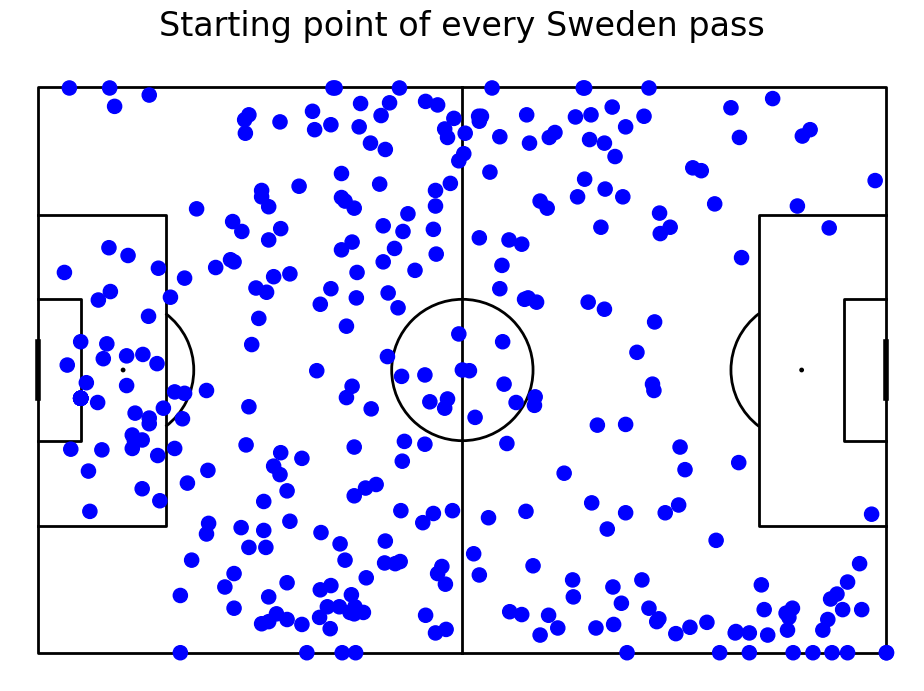

In [28]:
# define function for plotting passes
def plot_passes(df):
    #create pitch
    pitch = Pitch(line_color = "black")
    fig, ax = pitch.draw(figsize = (10, 7))

    # Plot passes by looping
    for i,pass_info in df.iterrows():

        # get coordinates, set circle size
        x = pass_info['x']
        y = pass_info['y']
        circleSize = 1

        # skip missing vals
        if pd.isnull(x) or pd.isnull(y):
            continue

        # plot pass
        passCircle = plt.Circle((x, y), circleSize, color = "blue")
        ax.add_patch(passCircle)
        
    return fig

# set title
fig = plot_passes(passes)
fig.suptitle("Starting point of every Sweden pass", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

# Plot only passes made by Caroline Seger

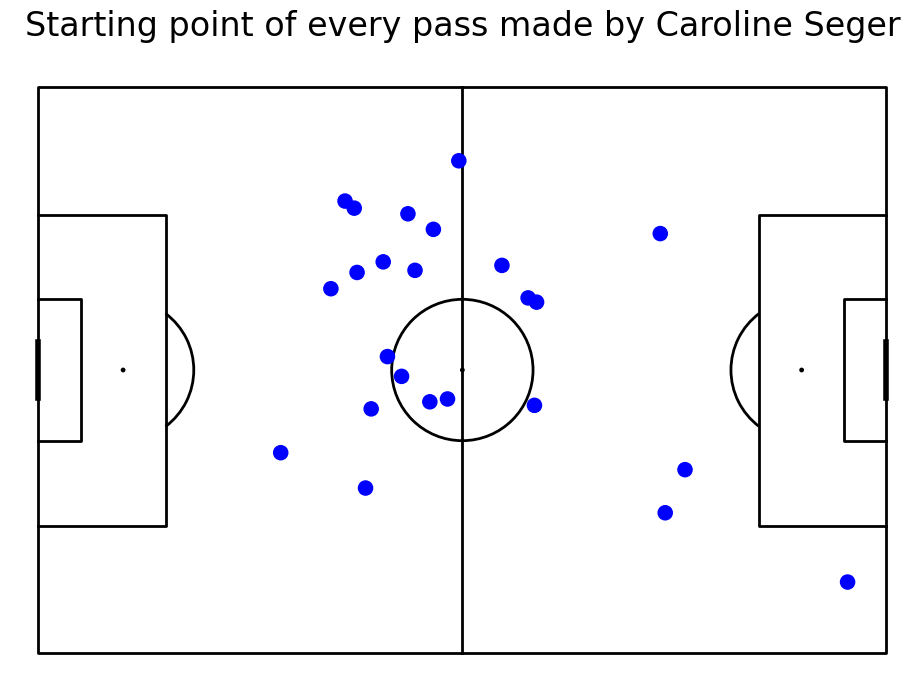

In [29]:
# create new dataframe with only Caroline Seger 
seger_passes = passes[passes['player_name'] == 'Sara Caroline Seger']

fig_seger = plot_passes(seger_passes)
fig_seger.suptitle("Starting point of every pass made by Caroline Seger", fontsize = 24)
fig_seger.set_size_inches(10, 7)
plt.show()


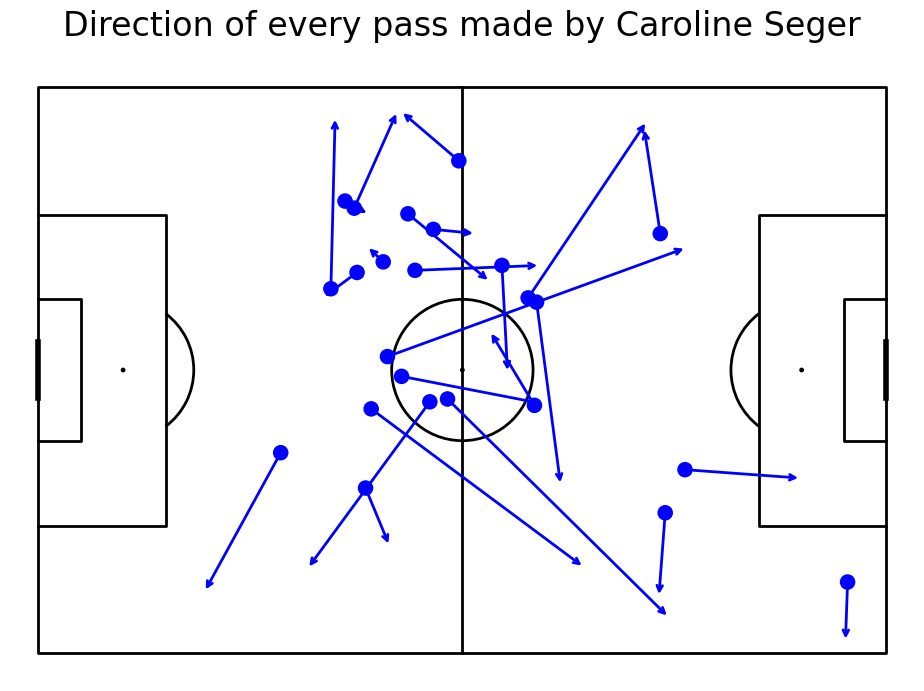

In [31]:
#create pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize = (10, 7))

# Plot passes by looping
for i,pass_info in seger_passes.iterrows():

# get coordinates, set circle size
    x_start = pass_info['x']
    y_start = pass_info['y']
    x_end = pass_info['end_x']
    y_end = pass_info['end_y']
    circleSize = 1

    # skip null vals
    if pd.isnull(x_start) or pd.isnull(y_start) or pd.isnull(x_end) or pd.isnull(y_end):
        continue

    # plot pass
    ax.annotate('', xy=(x_end, y_end), 
                    xytext=(x_start, y_start),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=2))
    passCircle = plt.Circle((x_start, y_start), circleSize, color = "blue")
    ax.add_patch(passCircle)

# set title
fig.suptitle("Direction of every pass made by Caroline Seger", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()